# Pymaceuticals Inc.
---

### Analysis

- Of all the regimens, Capomulin and Ramicane had the most mice in their data set.  They also proved to be the most efficacious of all drug regimens in the group.  Ketapril, Naftisol, Propriva, Stelasyn, and Zoniferol saw little to no effect on tumor growth based on weight.
- The correlation between mouse weight and the average tumor volume is 0.84, proving there is strong positive correlation, confirming as weight increases, so does the tumor. The linear regression analysis helped clarify how much the tumor volume would be affected as the weight of a mouse changed. This also proved that, though the model fit the data quite nicely, it showed that each regimen became less efficacious as the weight of the mouse increased. 

In [281]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from pprint import pprint 
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [282]:
# Check mouse_metadata data to see unique key that overlaps with study_results
mouse_metadata_df = pd.DataFrame(mouse_metadata)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [283]:
# Check study_results data to see unique key that overlaps with mouse_metadata; "Mouse ID" is the key identifier to be used for the merge.
study_results_df = pd.DataFrame(study_results)
study_results_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [284]:
length = len(mouse_metadata_df)
print(length)

249


In [285]:
length = len(study_results_df)
print(length)

1893


In [286]:
# Combine the data into a single DataFrame using a right merge
#merge_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="outer")

merge_df = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
merge_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [287]:
# Confirm length of data is accurate
length = len(merge_df)
print(length)

1893


In [288]:
# Check the total number of mice in the merged df.
total_mice_start = pd.unique(merge_df['Mouse ID'])
print(f'Total number of mice in merged DataFrame: {len(total_mice_start)}')

Total number of mice in merged DataFrame: 249


In [289]:
# Check the number of duplicate records 
duplicates = len(merge_df) - len(merge_df.drop_duplicates())
print(f'Total number of duplicate records that need to be removed: {duplicates}')


Total number of duplicate records that need to be removed: 1


In [290]:
# The data should be uniquely identified by Mouse ID and Timepoint
# Find the duplicate mouse by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [291]:
# Optional: Get all the data for the duplicate Mouse ID, which we know from above is 'g989')
duplicate_data_df = merge_df[merge_df["Mouse ID"] == 'g989'][["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex",
                                          "Age_months", "Weight (g)"]]
duplicate_data_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [292]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = clean_df.drop_duplicates(subset="Mouse ID", keep='first')
clean_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [293]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
print(f'Number of unique mice in the cleaned DataFrame: {clean_mice_count}')

# Total mice count in the merged DF was 249; after the single duplicate record was removed, there are now 248 unique mice in the merged, cleansed, DF.


Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [312]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group the data by Drug Regimen
grouped_data = merge_df.groupby("Drug Regimen")

# Calculate the summary stats
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Convert to DataFrame
df = pd.DataFrame(summary_stats)

# Rename Column Headers
df = df.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance',
                        'std': 'Tumor Volume Std. Dev', 'sem': 'Tumor Volume Std. Err'})
df.head(10)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [296]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Group the data by Drug Regimen
grouped_data = merge_df.groupby("Drug Regimen")

# Calculate the summary stats
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Convert to DataFrame
df = pd.DataFrame(summary_stats)
df.style.set_table_attributes("style='display:inline'").set_caption('Tumor Volume (mm3)')



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

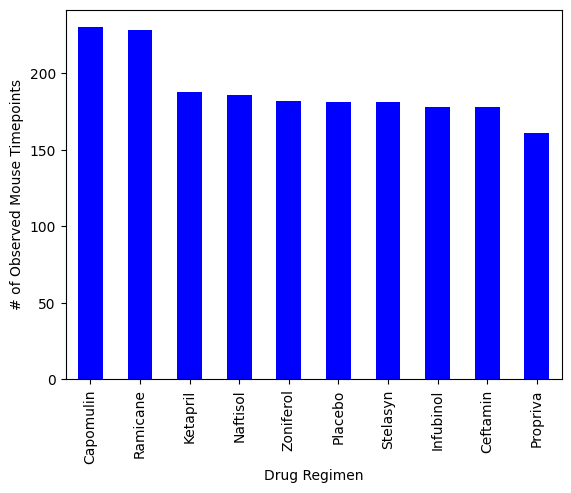

In [297]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by Drug Regimen and count the number of rows for each group
grouped_data = merge_df["Drug Regimen"].value_counts()

# Use plot() function to graph in Pandas
grouped_data.plot(x='Drug Regimen', y='# of Observed Mouse Timepoints', kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

grouped_data

In [298]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Generate an array with total mice for each regimen
total_mice_per_regimen = (merge_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
total_mice_per_regimen

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

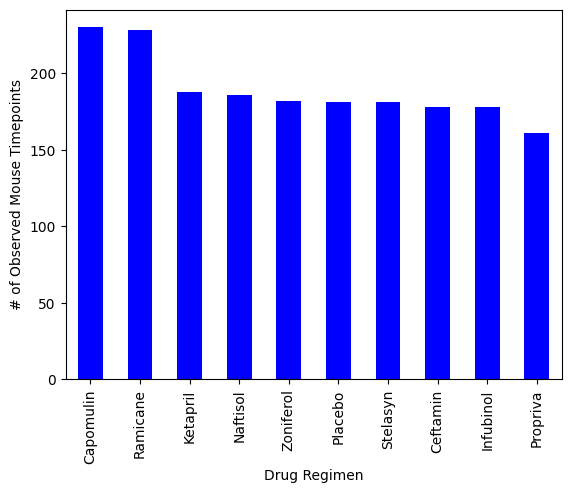

In [299]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by Drug Regimen and count the number of rows for each group
grouped_data = merge_df.groupby("Drug Regimen").size()

# Sort to view in descending order in bar plot
grouped_data = grouped_data.sort_values(ascending=False)

# Format and add lables to bar plot
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

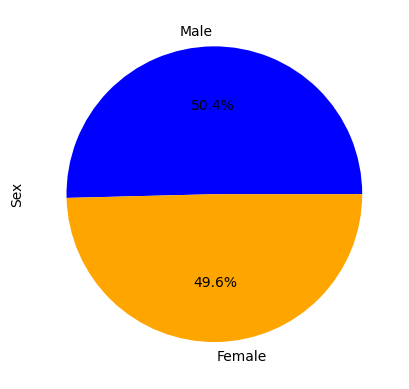

In [300]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

# Group the data by Drug Regimen and count the number of rows for each group
gender_count = clean_df['Sex'].value_counts()

# Create Pie Plot
gender_count.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'])

# Print the Pie Plot
plt.show()

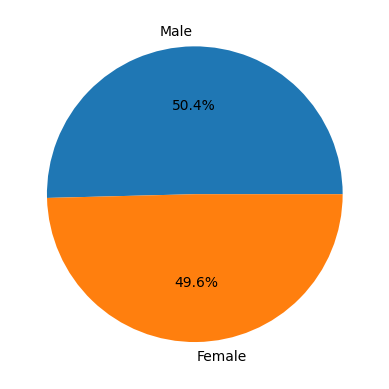

In [301]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

# Count the number of Male & Female mice
male_count = clean_df[clean_df['Sex'] == 'Male'].shape[0]
female_count = clean_df[clean_df['Sex'] == 'Female'].shape[0]

# Label Pie Plot
pie_labels = ['Male', 'Female']
counts = [male_count, female_count]
#plt.ylabel("count")

# Create Pie Plot
plt.pie(counts, labels= pie_labels, autopct='%1.1f%%')

# Print Pie Plot
plt.show()

## Quartiles, Outliers and Boxplots

In [302]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# FYI -  had trouble generating a loop to get the accurate numbers/outcome so ended up calculating data by regimen one at a time.
# I think something may be wrong with my clean_df - even though it has the right mouse count, the rest of the data doesn't look accurate.

Capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin",:]
Ramicane_df = merge_df.loc[merge_df['Drug Regimen'] == "Ramicane",:]
Infubinol_df = merge_df.loc[merge_df['Drug Regimen'] == "Infubinol",:]
Ceftamin_df = merge_df.loc[merge_df['Drug Regimen'] == "Ceftamin",:]


In [303]:
# FIRST Treatment Regimen
# Capomulin Final Tumor Volume 
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volume, merge_df, on=("Mouse ID","Timepoint"),how="left")

# Capomulin Stats & outliers
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin's potential outliers would include values below {lower_bound} and above {upper_bound}.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Capomulin's potential outliers would include values below 20.70456164999999 and above 51.83201549.


In [304]:
# SECOND Treatment Regimen
# Ramicane Final Tumor Volume 
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volume, merge_df, on=("Mouse ID","Timepoint"),how="left")

# Ramicane Stats & outliers
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane's potential outliers would include values below {lower_bound} and above {upper_bound}.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Capomulin tumors: 36.56165229 
Ramicane's potential outliers would include values below 17.912664470000003 and above 54.30681135.


In [305]:
# THIRD Treatment Regimen
# Infubinol Final Tumor Volume 
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_volume, merge_df, on=("Mouse ID","Timepoint"),how="left")

# Infubinol Stats & outliers
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol's potential outliers would include values below {lower_bound} and above {upper_bound}.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Infubinol's potential outliers would include values below 36.83290494999999 and above 82.74144559000001.


In [306]:
# FOURTH Treatment Regimen
# Ceftamin Final Tumor Volume 
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_volume, merge_df, on=("Mouse ID","Timepoint"),how="left")

# Infubinol Stats & outliers
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin's potential outliers would include values below {lower_bound} and above {upper_bound}.")

The lower quartile of Ceftamin tumors: 54.04860769
The upper quartile of Ceftamin tumors: 65.52574285
The interquartile range of Ceftamin tumors: 11.477135160000003
The median of Ceftamin tumors: 60.16518046 
Ceftamin's potential outliers would include values below 36.83290494999999 and above 82.74144559000001.


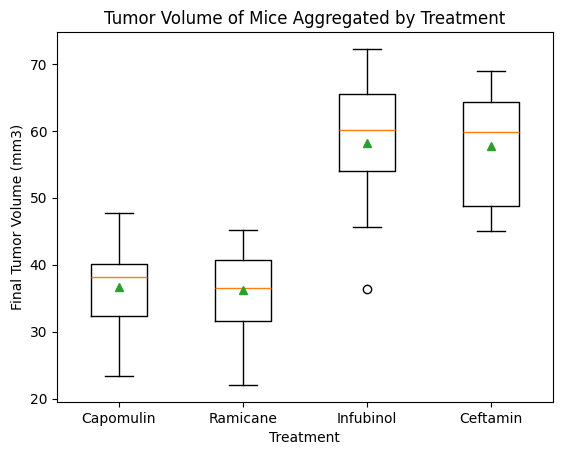

In [307]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Treatment_Data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Treatment_Groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.boxplot(Treatment_Data, labels=Treatment_Groups, showmeans=True)
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume of Mice Aggregated by Treatment")
plt.show()


## Line and Scatter Plots

In [274]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Check to make sure the data needed is included in Capomulin_df: Tumor Volume (mm3) and Timepoint, for Capomulin Mouse L509
capo_mouse_L509_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == 'l509',:]
capo_mouse_L509_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


[]

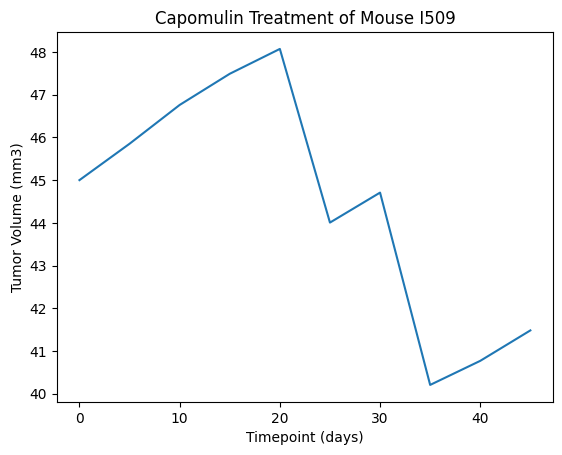

In [275]:
capo_tumor_vol = capo_mouse_L509_df["Tumor Volume (mm3)"]
capo_timepoint = capo_mouse_L509_df["Timepoint"]

plt.plot(capo_timepoint, capo_tumor_vol)
plt.title("Capomulin Treatment of Mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot()

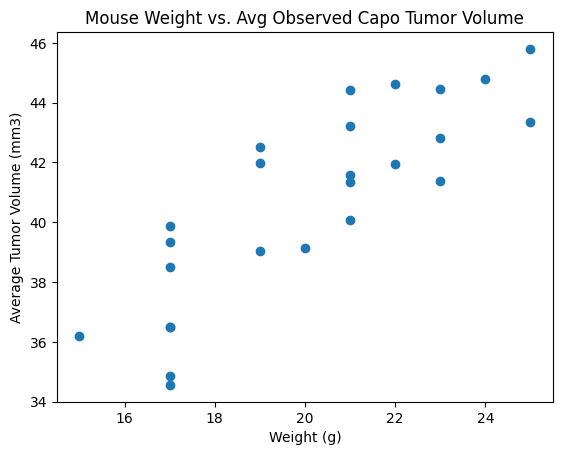

In [276]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# First, get avg
avg_capo_tumor_vol = Capomulin_df.groupby("Mouse ID").mean()

# Then, plot:
plt.scatter(avg_capo_tumor_vol['Weight (g)'], avg_capo_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Observed Capo Tumor Volume")
plt.show()


## Correlation and Regression

In [278]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_capo_tumor_vol['Weight (g)']
y_values = avg_capo_tumor_vol['Tumor Volume (mm3)']

correlation=st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


In [310]:
# Linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
print(f"Slope(m): {round(intercept,2)}")
print(f"Intercept(b): {round(intercept,2)}")
print(f"Correlation: {round(rvalue,2)}")

Slope(m): 21.55
Intercept(b): 21.55
Correlation: 0.84


regress_values(y) :
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


Text(0.5, 1.0, 'Linear Regression Model for Mouse Weight & Avg Tumor Volume')

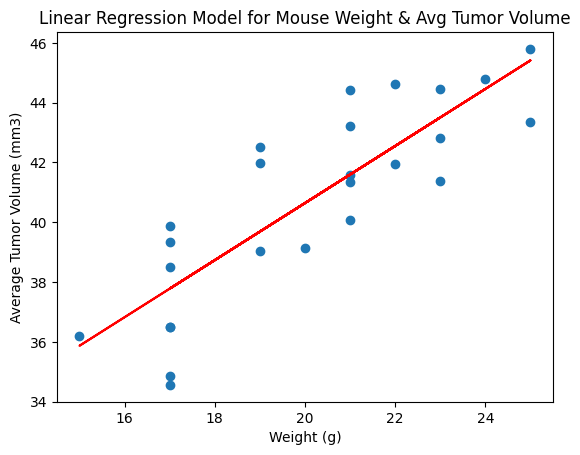

In [311]:
# Linear regression model: regress_values(y) = mx + b
regress_values = slope * x_values + intercept
print(f"regress_values(y) :\n{regress_values}")
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
#plt.annotate(line_eq,())
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression Model for Mouse Weight & Avg Tumor Volume")